# Tubes Machine Learning, notebook RNN

**Recurrent Neural Network (RNN)**
Notebook machine learning Kelompok 04.
*   13522031 - Zaki Yudhistira Candra
*   13522039 - Edbert Eddyson Gunawan
*   13522049 - Vanson Kurnialim

## Dataset setup and imports

  ### Repository clone

In [31]:
!git clone https://github.com/IndoNLP/nusax.git

fatal: destination path 'nusax' already exists and is not an empty directory.


### Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional

### Dataset preparation

In [33]:
path = "nusax/datasets/sentiment/indonesian/"

train_data = pd.read_csv(path+"train.csv")
test_data = pd.read_csv(path+"test.csv")

# Text extraction
X_train_text = train_data['text'].astype(str).values
y_train = train_data['label'].values

X_test_text = test_data['text'].astype(str).values
y_test = test_data['label'].values

# Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Configure tokenizer
vocab_size = 2796
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

# Tokenization
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Padding
max_len = 77
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

## Training

### RNN

#### Layer count variant

In [34]:
# Model layer_x infers the layer variant
embedding_dim = 128

model_layer_1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(64), # RNN layer
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_layer_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(64, return_sequences=True), # RNN layer
    SimpleRNN(64, return_sequences=True), # RNN layer
    SimpleRNN(64),
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_layer_3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(64, return_sequences=True), # RNN layer
    SimpleRNN(64, return_sequences=True), # RNN layer
    SimpleRNN(64, return_sequences=True), # RNN layer
    SimpleRNN(64, return_sequences=True), # RNN layer
    SimpleRNN(64),
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_layer_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_layer_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_layer_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
history_layer_1 = model_layer_1.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
history_layer_2 = model_layer_2.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
history_layer_3 = model_layer_3.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

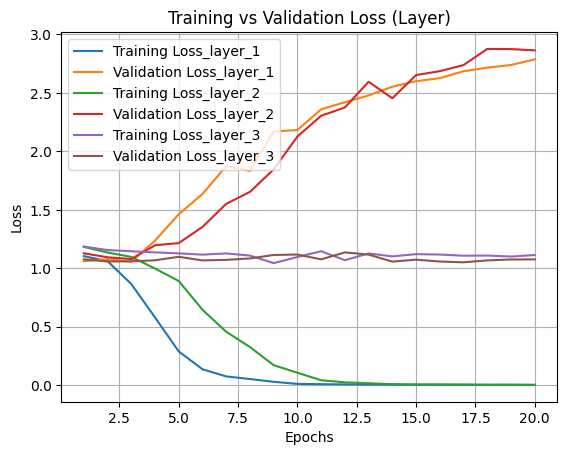

In [36]:
# Validation and training loss plot
train_loss_layer_1 = history_layer_1.history['loss']
val_loss_layer_1 = history_layer_1.history['val_loss']

train_loss_layer_2 = history_layer_2.history['loss']
val_loss_layer_2 = history_layer_2.history['val_loss']

train_loss_layer_3 = history_layer_3.history['loss']
val_loss_layer_3 = history_layer_3.history['val_loss']

epochs = range(1, len(train_loss_layer_1) + 1)

plt.plot(epochs, train_loss_layer_1, label='Training Loss_layer_1')
plt.plot(epochs, val_loss_layer_1, label='Validation Loss_layer_1')

plt.plot(epochs, train_loss_layer_2, label='Training Loss_layer_2')
plt.plot(epochs, val_loss_layer_2, label='Validation Loss_layer_2')

plt.plot(epochs, train_loss_layer_3, label='Training Loss_layer_3')
plt.plot(epochs, val_loss_layer_3, label='Validation Loss_layer_3')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Layer)')
plt.legend()
plt.grid(True)
plt.show()

#### Cell count variant

In [37]:
# Model cell_x infers the cell variant

model_cell_1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(64), # RNN layer
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_cell_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(128), # RNN layer
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_cell_3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(256), # RNN layer
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_cell_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cell_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cell_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history_cell_1 = model_cell_1.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
history_cell_2 = model_cell_2.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
history_cell_3 = model_cell_3.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

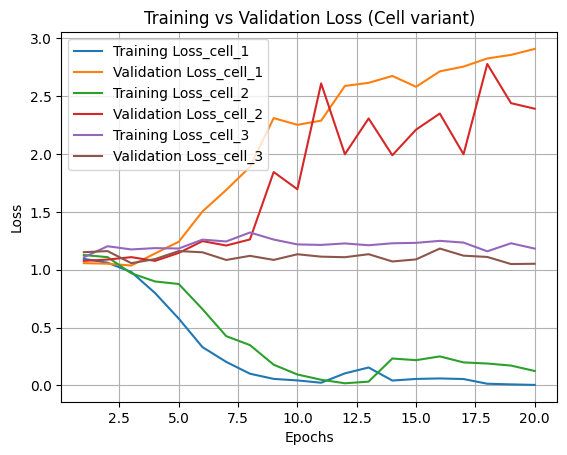

In [39]:
# Validation and training loss plot
train_loss_cell_1 = history_cell_1.history['loss']
val_loss_cell_1 = history_cell_1.history['val_loss']

train_loss_cell_2 = history_cell_2.history['loss']
val_loss_cell_2 = history_cell_2.history['val_loss']

train_loss_cell_3 = history_cell_3.history['loss']
val_loss_cell_3 = history_cell_3.history['val_loss']

epochs = range(1, len(train_loss_layer_1) + 1)

plt.plot(epochs, train_loss_cell_1, label='Training Loss_cell_1')
plt.plot(epochs, val_loss_cell_1, label='Validation Loss_cell_1')

plt.plot(epochs, train_loss_cell_2, label='Training Loss_cell_2')
plt.plot(epochs, val_loss_cell_2, label='Validation Loss_cell_2')

plt.plot(epochs, train_loss_cell_3, label='Training Loss_cell_3')
plt.plot(epochs, val_loss_cell_3, label='Validation Loss_cell_3')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Cell variant)')
plt.legend()
plt.grid(True)
plt.show()

#### Type variant

In [40]:
# Model type_x infers the type variant, normal and bidirectional

model_type_1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    SimpleRNN(128), # RNN layer
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_type_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len), # Embedding layer
    Bidirectional(SimpleRNN(128)), # RNN layer
    Dropout(0.5),
    Dense(64, activation='relu'), # Dense layer
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer
])

model_type_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_type_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history_type_1 = model_type_1.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
history_type_2 = model_type_2.fit(X_train_pad, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

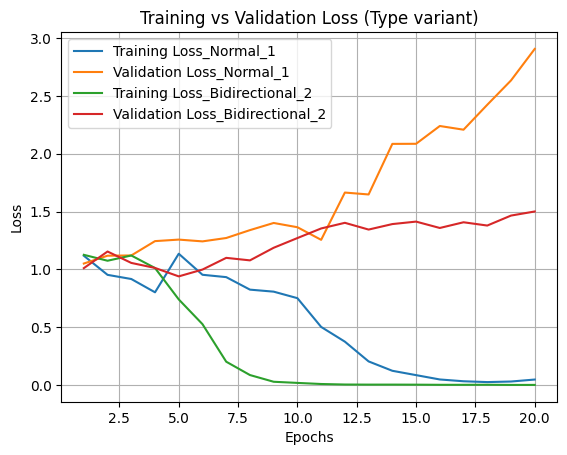

In [42]:
# Validation and training loss plot
train_loss_type_1 = history_type_1.history['loss']
val_loss_type_1 = history_type_1.history['val_loss']

train_loss_type_2 = history_type_2.history['loss']
val_loss_type_2 = history_type_2.history['val_loss']

epochs = range(1, len(train_loss_layer_1) + 1)

plt.plot(epochs, train_loss_type_1, label='Training Loss_Normal_1')
plt.plot(epochs, val_loss_type_1, label='Validation Loss_Normal_1')

plt.plot(epochs, train_loss_type_2, label='Training Loss_Bidirectional_2')
plt.plot(epochs, val_loss_type_2, label='Validation Loss_Bidirectional_2')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Type variant)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
model_type_2.save('model_type_2_CNN.keras')
model_type_2.summary()
model_type_2.layers[1].forward_layer.name

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ (None, 77, 128)        │       357,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320,971 (5.04 MB)

 Trainable params: 440,323 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 880,648 (3.36 MB)

'forward_simple_rnn_50'